### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
## Checking the tensorflow version
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
## Storing all the useful independent features under X and dependent feature under y

x = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [5]:
x.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Encoding categorical data

#### Label Encoding the "Gender" column

In [7]:
## Label encoder applies the integer values as per alphabetical order

from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
x['Gender'] = le_gender.fit_transform(x['Gender'])

In [8]:
x.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


#### Using pandas 'get dummies' for encoding 'Geography' column

In [9]:
## we will use pandas get dummies to convert it into integer as there are more than two categorical features

dummies = pd.get_dummies(x.Geography, drop_first=True) ## we will drop 1 coulmn to avoid dummy variable trap
dummies.head(10)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
5,0,1
6,0,0
7,1,0
8,0,0
9,0,0


#### Concating both the dataset and dummies dataframe

In [10]:
X = pd.concat([dummies,x], axis=1)
X.drop('Geography', axis=1, inplace=True)

In [11]:
X.head(10)

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,619,0,42,2,0.00,1,1,1,101348.88
1,0,1,608,0,41,1,83807.86,1,0,1,112542.58
2,0,0,502,0,42,8,159660.80,3,1,0,113931.57
3,0,0,699,0,39,1,0.00,2,0,0,93826.63
4,0,1,850,0,43,2,125510.82,1,1,1,79084.10
5,0,1,645,1,44,8,113755.78,2,1,0,149756.71
6,0,0,822,1,50,7,0.00,2,1,1,10062.80
7,1,0,376,0,29,4,115046.74,4,1,0,119346.88
8,0,0,501,1,44,4,142051.07,2,0,1,74940.50
9,0,0,684,1,27,2,134603.88,1,1,1,71725.73


In [12]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Feature Scaling

In [15]:
## Feature scaling is the most important part in Deep learning

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [33]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [34]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))  ## input layer is generated automatically

### Adding the second hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))  ## for input and hidden layer 'ReLU' is good option

### Adding the output layer

In [36]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  ## for output layer 'sigmoid' is a good option

## Part 3 - Training the ANN

### Compiling the ANN

In [37]:
## for binary classfication, loss = 'binary_crossentropy'
## for non-binary classfication, loss = 'categorical_crossentropy'

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [39]:
## Training the ANN in batches

ann.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8649
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8640
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8648
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8643
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8654
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8634
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8646
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8648
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3292 - accuracy: 0.8650
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3294 - accuracy: 0.8630

## Part 4 - Making the predictions and evaluating the model


### Predicting the result of a single observation

Predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

In [22]:
## We will scale this inputs as during the training we have trained the network with scaled inputs
ann.predict(sc.transform([[0,0,600,1,40,3,60000,2,1,1,50000]]))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 284ms/step


array([[0.06301241]], dtype=float32)

##### From above prediction we can see that the customer will not exit the bank

### Predicting the Test set results

In [23]:
y_pred = ann.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [32]:
## We will multiply the y_pred array with 1 to convert false and true into 0 and 1

y_pred = (y_pred > 0.5) * 1
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

### Making the Confusion Matrix and plotting it on 'Heatmap'

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test,y_pred)

[[1538   54]
 [ 237  171]]


0.8545

Text(50.722222222222214, 0.5, 'Truth')

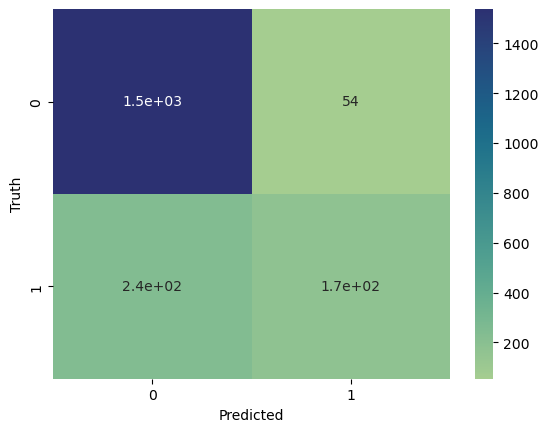

In [27]:
sns.heatmap(cm, annot=True, cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Truth')